# NPR Articles | Unsupervised Topic Modeling
## Clustering Topics with Latent Dirichlet Allocation and Non-Negative Matrix Factorization

**Author**: Miguel Santana

Thank you for reviewing this repository. The author's contact info, sources and social media profiles are listed below under **further information.**

The contents of this repository detail a clustering analysis of National Public Radio (NPR) articles for topic discovery. The analysis will provide insight into clustering and dimensionality reduction within the context of natural language processing. 

#### Project Framework | OSEMN

**Data processing and analysis is completed using the OSEMN framework. The structure includes: Obtaining the data, Scrubbing (processing), Exploratory Data Analysis, Statistical Modeling and Interpretation of the Results.**

#### The Data

The dataset includes over 11,000 unlabeled NPR articles. The dataset was originally sourced from Udemy. The Udemy citation is available below under sources.

#### Package Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LDA Analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# NMF Analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Import Data

In [3]:
df = pd.read_csv('npr.csv')
print(df.shape)
df.head(3)

(11992, 1)


,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...


# Scrubbing | Data Cleaning
### Null Values

In [4]:
df.isnull().sum()

Article    0
dtype: int64

The provided dataset is available for illustrative purposes and as such requires no data pre-processing at this time. 

# Exploratory Data Analysis
### Article Lengths

In [5]:
# review length
df['ArticleLength'] = df['Article'].apply(len)

In [6]:
df['ArticleLength'].describe()

count    11992.000000
mean      4537.238326
std       3005.030825
min         59.000000
25%       2857.000000
50%       4020.500000
75%       5503.750000
max      54078.000000
Name: ArticleLength, dtype: float64

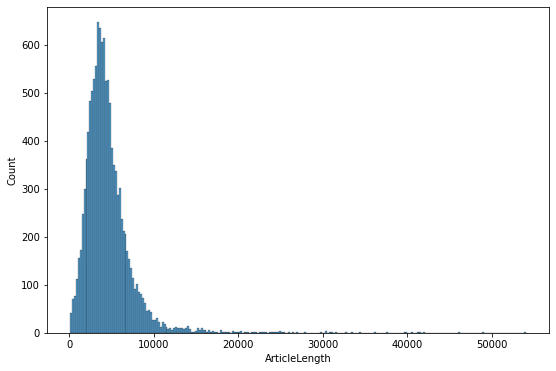

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
sns.histplot(data=df,x='ArticleLength');

The average article length is just under 5000. 

# Statistical Modeling 
## Latent Dirichlet Allocation

In [8]:
cv = CountVectorizer(max_df=0.9,min_df=2,stop_words='english') 
# fit / transform (unsupervised)
dtm = cv.fit_transform(df['Article'])

Parameters included: 
* 1) ignoring terms with high document frequency
* 2) discarding words occurring in 90 percent of docs
* 3) removing stop words

In [9]:
# Selecting K (7)
LDA = LatentDirichletAllocation(n_components=7,random_state=42)
# fit the model
LDA.fit(dtm) 

LatentDirichletAllocation(n_components=7, random_state=42)

In [10]:
wordcount = len(cv.get_feature_names())
print(f'The NPR articles contain a total of {wordcount} words.')

The NPR articles contain a total of 54777 words.


### Top Words
#### Top 15 Per Topic

In [11]:
for i,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{i}')
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['companies', 'money', 'year', 'federal', '000', 'new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


THE TOP 15 WORDS FOR TOPIC #1
['military', 'house', 'security', 'russia', 'government', 'npr', 'reports', 'says', 'news', 'people', 'told', 'police', 'president', 'trump', 'said']


THE TOP 15 WORDS FOR TOPIC #2
['way', 'world', 'family', 'home', 'day', 'time', 'water', 'city', 'new', 'years', 'food', 'just', 'people', 'like', 'says']


THE TOP 15 WORDS FOR TOPIC #3
['time', 'new', 'don', 'years', 'medical', 'disease', 'patients', 'just', 'children', 'study', 'like', 'women', 'health', 'people', 'says']


THE TOP 15 WORDS FOR TOPIC #4
['voters', 'vote', 'election', 'party', 'new', 'obama', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']


THE TOP 15 WORDS FOR TOPIC #5
['years', 'going', 've', 'life', 'don', 'new', 'way', 'music', 'really', 'time', 'know', 'think',

#### Selecting Topic Labels & Mapping Features

In [12]:
topic_results = LDA.transform(dtm)
# only interested in index of highest prob
df['TopicLDA'] = topic_results.argmax(axis=1)

In [13]:
df.head(2)

,Article,ArticleLength,TopicLDA
0,"In the Washington of 2016, even when the polic...",7646,1
1,Donald Trump has used Twitter — his prefe...,3856,1


In [14]:
mytopic_dict = {0:'Money',1:'Politics',2:'People',3:'Health',4:'Lifestyle',5:'Other',6:'Education'}
df['TopicLDA'] = df['TopicLDA'].replace(mytopic_dict)

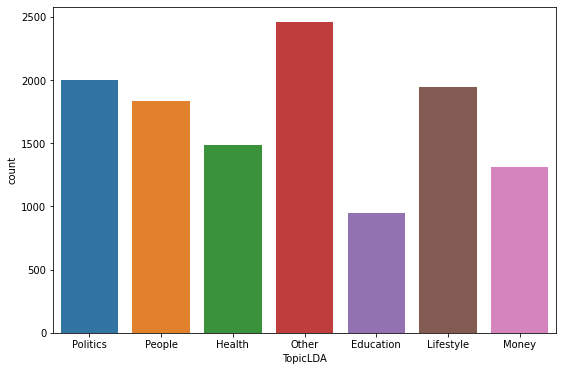

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
sns.countplot(x='TopicLDA',data=df);
# g.savefig('lengthofreviews.jpg',dpi=200,bbox_inches='tight')

## Non-Negative Matrix Factorization

In [22]:
# term frequency - inverse doc frequ vectorizer
tfidf = TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english') 
dtm = tfidf.fit_transform(df['Article'])

In [23]:
nfm_model = NMF(n_components=7,random_state=42)
# fit model
nfm_model.fit(dtm)

NMF(n_components=7, random_state=42)

### Top Words NMF
#### Top 15 Words Per Topic

In [24]:
topic_results = nfm_model.transform(dtm)

In [25]:
for index,topic in enumerate(nfm_model.components_):
    print(f"THE TOP 15 WORDS FOR TOPIC #{index}")
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n') # not highest prob, ITS HIGHEST COEFF VALUES

THE TOP 15 WORDS FOR TOPIC #0
['new', 'research', 'like', 'patients', 'health', 'disease', 'percent', 'women', 'virus', 'study', 'water', 'food', 'people', 'zika', 'says']


THE TOP 15 WORDS FOR TOPIC #1
['gop', 'pence', 'presidential', 'russia', 'administration', 'election', 'republican', 'obama', 'white', 'house', 'donald', 'campaign', 'said', 'president', 'trump']


THE TOP 15 WORDS FOR TOPIC #2
['senate', 'house', 'people', 'act', 'law', 'tax', 'plan', 'republicans', 'affordable', 'obamacare', 'coverage', 'medicaid', 'insurance', 'care', 'health']


THE TOP 15 WORDS FOR TOPIC #3
['officers', 'syria', 'security', 'department', 'law', 'isis', 'russia', 'government', 'state', 'attack', 'president', 'reports', 'court', 'said', 'police']


THE TOP 15 WORDS FOR TOPIC #4
['primary', 'cruz', 'election', 'democrats', 'percent', 'party', 'delegates', 'vote', 'state', 'democratic', 'hillary', 'campaign', 'voters', 'sanders', 'clinton']


THE TOP 15 WORDS FOR TOPIC #5
['love', 've', 'don', 'al

#### Selecting Topic Labels & Mapping Features

In [26]:
df['TopicNMF'] = topic_results.argmax(axis=1)

In [27]:
mytopic_dict = {0:'Health',1:'Politics',2:'Health Care',3:'Military',4:'Election',5:'Lifestyle',6:'Education'}
df['TopicNMF'] = df['TopicNMF'].replace(mytopic_dict)

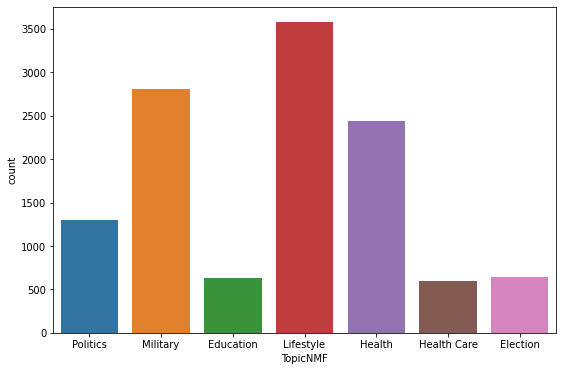

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
sns.countplot(x='TopicNMF',data=df);
# g.savefig('lengthofreviews.jpg',dpi=200,bbox_inches='tight')

### Results, Limitations, Future Work

#### Results and Limitations
Topic modeling through LDA or MNF is an unsupervised learning process. As a result, we have no way of validating our model results. In this particular case, both algorithms clustered topics in a similar way but the non-negative matrix factorization algorithm separated the topics in a more distinguishable way. MNF simultaneously performs dimensionality reduction and clustering to achieve its results. 

#### Future Work

Future work should include the use of recurrent neural networks for text classification and sentiment analysis within the context of topic modeling for enhanced performance. 

#### Further Information

For any additional questions, please reach out via email at santana2.miguel@gmail.com, on [LinkedIn](https://www.linkedin.com/in/miguel-angel-santana-ii-mba-51467276/) or on [Twitter.](https://twitter.com/msantana_ds)

#### Sources

Additional analysis, notes and file sources can be found on Udemy's website. 

* Course Name: NLP - Natural Language Processing with Python by Jose Portilla